In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from efficient_multilingual_continual_pretraining.constants import PROJECT_ROOT 

In [ ]:
# TODO: some categories are actually kinda similar to "electronics", e.g. "pc" or "camera" 
#   and those do not have a small number of objects. Maybe we should include them as well? 

# Test file distribution of stars is a little different from train and val. Should not be a problem though.

In [29]:
df = pd.read_csv(PROJECT_ROOT / "data/amazon_reviews_multi/test.csv", index_col=0)
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0784695,product_de_0572654,reviewer_de_0645436,1,"Leider, leider nach einmal waschen ausgebliche...",Leider nicht zu empfehlen,de,home
1,de_0759207,product_de_0567331,reviewer_de_0183703,1,zunächst macht der Anker Halter einen soliden ...,Gummierung nach 6 Monaten kaputt,de,wireless
2,de_0711785,product_de_0482105,reviewer_de_0182152,1,Siegel sowie Verpackung war beschädigt und war...,Flohmarkt ware,de,industrial_supplies
3,de_0964430,product_de_0616480,reviewer_de_0991563,1,Habe dieses Produkt NIE erhalten und das Geld ...,Katastrophe,de,industrial_supplies
4,de_0474538,product_de_0228702,reviewer_de_0316188,1,Die Träger sind schnell abgerissen,Reißverschluss klemmt,de,luggage


In [30]:
df = df[(df['language'] == 'de') & (df['product_category'] == 'electronics')]
df = df.drop(["review_id", "product_id", "reviewer_id", "language", "product_category"], axis=1)
df = df[['review_body', 'review_title', 'stars']]
df.head()

,review_body,review_title,stars
53,Leider absoluter Fehlkauf! Die Qualität und Ve...,Nicht kaufen!,1
60,"Bereits nach wenigen tag in gebrauch kaputt, s...",Schnell kaputt,1
68,Komplette Verarsche! Finger weg! Die App funkt...,Verarsche!,1
120,"Hallo, Eine der zwei Antennen ist ist leider n...",Da fehlt was,1
129,Funktioniert leider nicht. Gibt keinerlei Sign...,Mangelhaft. Funktion nicht gegeben,1


<Axes: >

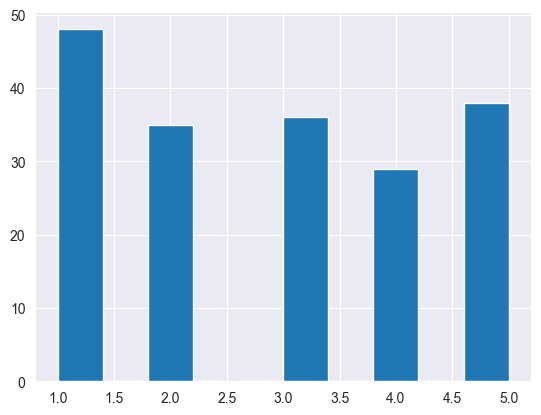

In [31]:
df['stars'].hist()